### 1. Даны функции для сортировки массивов, которые работают за O(N^2): Пузырек и сортировка выбором, эмпирически определить, какая реализация быстрее и как зависит разница времени исполнения одного и другого от длины входного массива


Как решать:

    1) Генерируем случайный список чисел длины N и его точную копию

    2) Сортируем первый пузырьком, второй - выбором, в обоих случаях засекаем время

    3) Записываем время сортировки при длине N в списки.

    4) Получаем зависимость разницы времени исполнения от длины

    5) Готово, вы восхитительны.

Чтобы повысить точность, для каждого N можно сгенерировать случайный список несколько раз и усреднить время.

In [1]:
def bubble_sort(nums):

    # Устанавливаем swapped в True, чтобы цикл запустился хотя бы один раз
    swapped = True

    while swapped:
        swapped = False

        # Идем циклом по индексам наших элементов
        for i in range(len(nums) - 1):
#             print(nums)
            # Если текущий элемент слева больше своего элемента справа
            if nums[i] > nums[i + 1]:

                # Меняем элементы местами
                nums[i], nums[i + 1] = nums[i + 1], nums[i]

                # Устанавливаем swapped в True для следующей итерации
                swapped = True

                # По окончании первого прогона цикла for
                # самый большой элемент "Всплывет" наверх
                
                
def selection_sort(nums):

    # Значение i соответствует кол-ву отсортированных значений
    for i in range(len(nums)):

        # Исходно считаем наименьшим первый элемент
        lowest_value_index = i

        # Этот цикл перебирает несортированные элементы
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j

        # Самый маленький элемент меняем с первым в списке
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]



In [48]:
# Решение

import time
import random
import statistics
import matplotlib.pyplot as plt

N_LIST_MAX_SIZE = 1000
INCR_STEP = 10
N_REPEATS = 10

def measure_time(func, *args, **kwargs):
    
    t = time.perf_counter()
    func(*args, **kwargs)

    return time.perf_counter() - t

sizes = list(range(1, N_LIST_MAX_SIZE, 10))
bubble_times = []
selection_times = []

for n in sizes:
    tmp_bubble_results = []
    tmp_selection_results = []
    for _ in range(N_REPEATS):
        sample = random.sample(range(-2147483648, 2147483647), n)
        sample_copy = sample.copy()

        tmp_bubble_results.append(measure_time(bubble_sort, sample))
        tmp_selection_results.append(measure_time(selection_sort, sample_copy))
        
    bubble_times.append(round(statistics.mean(tmp_bubble_results)*1000, 2))
    selection_times.append(round(statistics.mean(tmp_selection_results)*1000, 2))

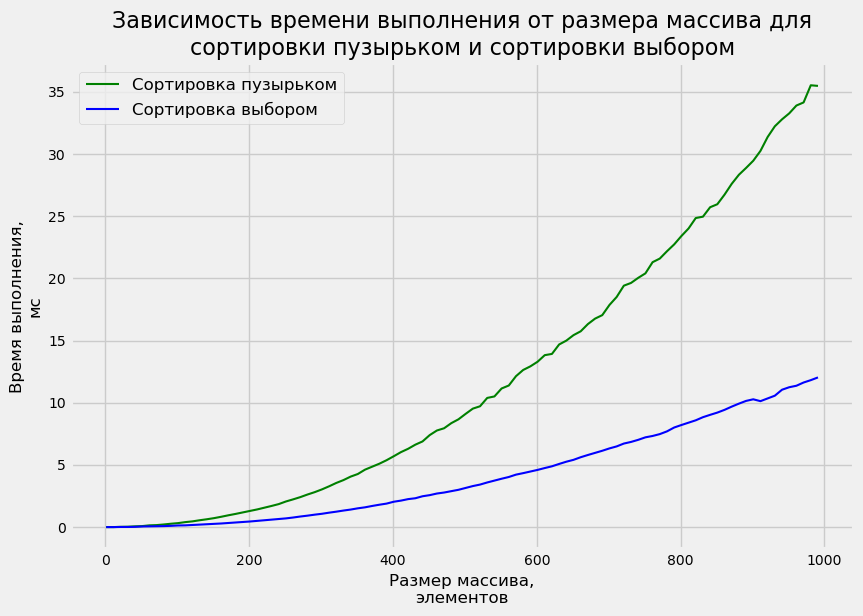

In [49]:
# Строим график

fs = 12
lw = 1.5
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches((9,6))

ax.plot(sizes, bubble_times, c='green', linewidth=lw, label='Сортировка пузырьком')
ax.plot(sizes, selection_times, c='blue', linewidth=lw, label='Сортировка выбором')

ax.set_xlabel('Размер массива,\nэлементов', fontsize=fs)
ax.set_ylabel('Время выполнения,\nмс', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)
ax.legend(fontsize=fs)

ax.set_title('Зависимость времени выполнения от размера массива для\nсортировки пузырьком и сортировки выбором',
             fontsize=fs+4)

plt.show()

In [50]:
# Посчитаем, во сколько быстрее отрабатывает в среднем сортировка выбором
faster_by = []

for x, y in zip(bubble_times, selection_times):
    if x != 0 and y!= 0:
        faster_by.append(x / y)

faster_by_mean = round(statistics.mean(faster_by), 2)

print(f'Сортировка выбором работает в среднем в {faster_by_mean} раз(а) быстрее.\n'+ \
      'Зависимость обоих алгоритмов от размера массива представлена на графике')

Сортировка выбором работает в среднем в 2.83 раз(а) быстрее.
Зависимость обоих алгоритмов от размера массива представлена на графике


### 2. [Алгоритм имитации отжига](https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/)

Прочтите статью про алгоритм имитации отжига (я сдернул информацию по ссылке), это простейший не-градиентный алгоритм оптимизации функций(поиска экстремума)


**Задание 1**

Проверьте, как зависит скорость сходимости алгоритма для целевой функии вида $y = x^2$ от:

1) начальной температуры

2) размера шага алгоритма (попробуйте подомножать результаты randn на число и заменить нормальное распределение на равномерное)


**Задание 2**

Попробовать желательно, но не обязательно.

Модифицируйте алгоритм так чтобы он работал для квадратичной функции от двух переменных $x^2 + y^2$ и , если возможно, от n переменных.

In [29]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(x):
    return x[0]**2.0

def simulated_annealing(objective, bounds, n_iterations, step_size, temp, verbose=False):
    # generate an initial point
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    t = temp
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + randn(len(bounds)) * step_size
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            # report progress
            if verbose:
                print('>%d f(%s) = %.5f' % (i, best, best_eval))
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        metropolis = exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval

        yield [curr[0], curr_eval, t]
#     return [best, best_eval]

<IPython.core.display.Javascript object>


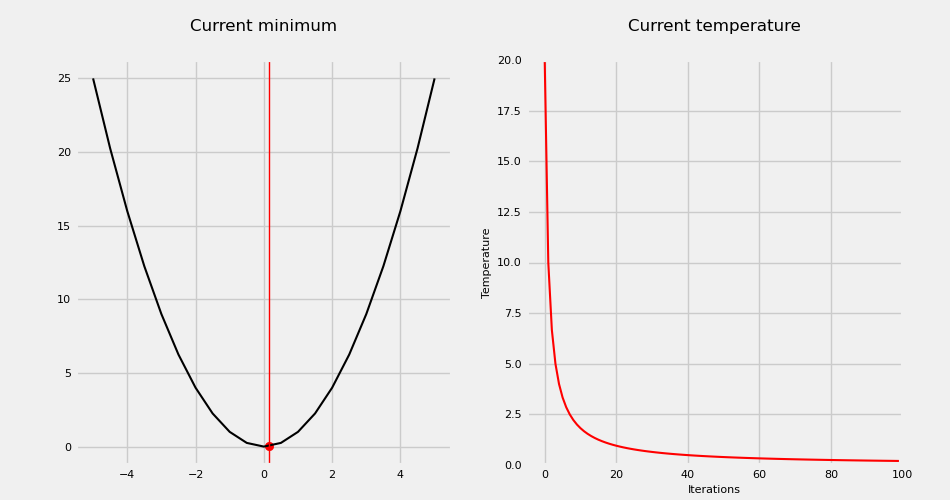

In [31]:
# Визуализируем работу алгоритма на анимированном графике

%matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.style.use('fivethirtyeight')

# Та же функция objective, только на вход принимает число, а не массив
def objective_float(x):
    return x**2.0

bounds = np.asarray([[-5.0, 5.0]])
iterations = 100
step = 0.1
t = 20

fs = 8 # fontsize

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((9.5, 5))

objective_x = np.arange(bounds[:, 0], bounds[:, 1]+0.5, 0.5)
objective_y = list(map(objective_float, objective_x))

# Задаем объекты на графике, где будет заданная функция и текущий надейденный минимум на каждой итерации
ax1.plot(objective_x, objective_y, lw=1.5, color='black')
vl = ax1.axvline(0, ls='-', color='r', lw=1)
dot = ax1.scatter(0, 0, color='r')
# Настраиваем параметры графика
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_title('Current minimum', fontsize=fs+4, y=1.05)

# Задаем объект графика температуры
temp_graph, = ax2.plot([], [], color='r', lw=1.5)
temp_graph_x, temp_graph_y = [], []
# Настраиваем параметры графика
ax2.set_xlim(-5, iterations)
ax2.set_ylim(0, t)
ax2.set_xlabel('Iterations', fontsize=fs)
ax2.set_ylabel('Temperature', fontsize=fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_title('Current temperature', fontsize=fs+4, y=1.05)

# Результат выполнения функции алгоритма имитации отжига
estimations = list(simulated_annealing(objective, bounds, iterations, step, t))

# Функция обновления графика, вызываемая на каждом новом фрейме
def update(frame):
    x, y, temp = estimations[frame]
    vl.set_xdata([x, x])
    dot.set_offsets(np.stack([x, y]).T)
    
    temp_graph_x.append(frame)
    temp_graph_y.append(temp)
    
    temp_graph.set_data(temp_graph_x, temp_graph_y)
    return vl, dot, temp_graph

anim = animation.FuncAnimation(fig, update, frames=iterations, interval=100, repeat=False)

plt.show()

In [16]:
# Проверим скорость схождения алгоритма от начальной температуры
import statistics

# Немного модифицируем исходную функцию
def simulated_annealing_modified(objective, bounds, n_iterations, step_size, temp, distr=randn, verbose=False):
    # generate an initial point
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    t = temp
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + distr(len(bounds)) * step_size
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            # report progress
            if verbose:
                print('>%d f(%s) = %.5f' % (i, best, best_eval))
        # return the new best point if it is near true minimum of the objective
        if best_eval <= 0.001:
            return [best[0], best_eval, i]
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        metropolis = exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    # Если минимум так и не найден, возвращаем None
    return None
    
# Зададим парметры функции
bounds = np.asarray([[-5., 5.]])
n_iterations = 1000
# step_size в данном случае выступает в случае стандартного отклонения
step_size = 1
# Зададим массив значений для температуры
temps = np.arange(1, 101, 1)

# Для каждого значения температуры прогоним функцию n раз, а затем усредним полученные результаты
# Создадим список со значениями n
n_repeats = [10, 100]
# Задаем словарь со списками, куда будем складывать результаты, сколько в среднем 
# итераций понадобилось для нахождения минимума
iterations_took = {k:[] for k in n_repeats}

for n in n_repeats:
    for t in temps:
        local_iterations = []
        for _ in range(n):
            results = simulated_annealing_modified(objective, bounds, n_iterations, step_size, t)
            if results:
                local_iterations.append(results[-1])
        if len(local_iterations) == 0:
            iterations_took[n].append(0)
        else:
            iterations_took[n].append(statistics.mean(local_iterations))
        
print(iterations_took)

{10: [37.5, 29.6, 46.6, 29.5, 49.3, 44.7, 51.5, 32, 45, 40.7, 39.1, 49.7, 35.9, 58.9, 46.2, 50.8, 36.6, 79.1, 55.3, 34, 51.7, 38.1, 31.3, 89.6, 46.1, 40.1, 82.5, 69.7, 63.2, 48.4, 51.9, 65.5, 45.3, 55.2, 48.7, 68.6, 78, 50.3, 38.3, 52.6, 58.3, 63.9, 36.3, 52.9, 46.7, 54.9, 39.9, 48, 57.4, 62.5, 55.1, 46, 71.2, 35.2, 48.1, 83.8, 42.1, 56.2, 56.7, 45.5, 53.6, 55.8, 56.5, 61.6, 61.5, 68.1, 44.6, 65.7, 46.6, 70.1, 68, 75.6, 59.6, 46.7, 88.5, 66.2, 92.3, 49, 41.6, 77, 61.3, 79.6, 62.3, 71, 53.9, 37.1, 45.5, 51.6, 67.4, 78.6, 65.5, 52.2, 63.8, 45.6, 84.5, 71.8, 71.6, 81.8, 75.5, 57.4], 100: [47.15, 42.02, 44.31, 48.9, 36.01, 40.04, 45.11, 41.6, 36.23, 50.83, 49.16, 45.43, 50.84, 52.68, 48.36, 50.08, 53.99, 44.34, 53.37, 55.37, 49.38, 51.19, 54.15, 55.55, 57.21, 60.95, 55.14, 55.5, 51.87, 56.89, 54.51, 54.46, 54.48, 49.17, 59.54, 54.74, 52.26, 54.67, 50.92, 62.21, 54.16, 55.64, 52.52, 57.76, 59.86, 49.86, 51.87, 54.08, 58.16, 62.8, 56.71, 64.83, 58.74, 55.45, 54.99, 54.92, 66.61, 64.05, 56.19

<IPython.core.display.Javascript object>


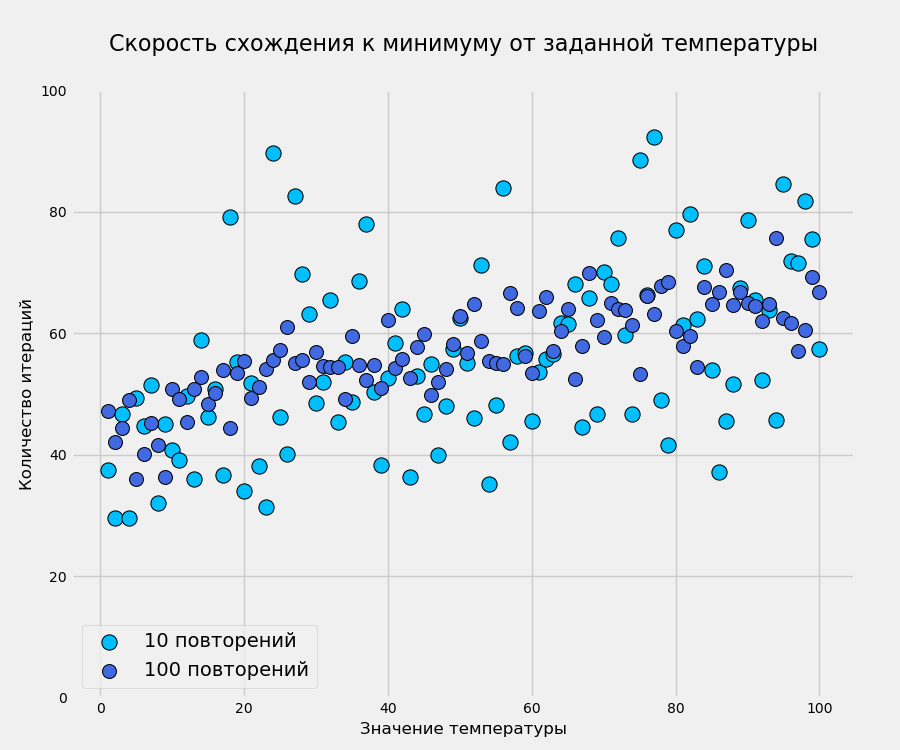

Среднее количество итераций для схождения алгоритма при разных значениях начальной температуры:
При 10 повторениях: 55.944;
При 100 повторениях: 57.0079



In [17]:
# Построим график зависимости скорости схождения от заданной температуры

fig, ax = plt.subplots()
fig.set_size_inches(9, 7.5)

fs = 12

colors = (c for c in ['deepskyblue', 'royalblue'])
alpha = (a for a in [1, 1])
sizes = (s for s in [120, 100])

for n, results in iterations_took.items():
    ax.scatter(
        temps, results, color=next(colors), alpha=next(alpha),
        s=next(sizes), lw=0.75, edgecolor='black', label=f'{n} повторений'
    )

ax.set_ylim(0, 100)
ax.legend()
ax.set_xlabel('Значение температуры', fontsize=fs)
ax.set_ylabel('Количество итераций', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)
ax.set_title('Скорость схождения к минимуму от заданной температуры', fontsize=fs+4, y=1.05)

plt.show()

print(f'Среднее количество итераций для схождения алгоритма при разных значениях начальной температуры:\n' +
     f'При 10 повторениях: {statistics.mean(iterations_took[10])};\n' +
     f'При 100 повторениях: {statistics.mean(iterations_took[100])}\n')

Из графика видно, что существует линейная обратно пропорциональная зависимость между температурой и скоростью схождения: чем больше начальная температура, тем меньше скорость схождения.

In [14]:
# Проверим зависимость скорости схождения от значения step_size и от типа распределения

# Делаем набор значений шага в пределах границ заданной функции
step_sizes = np.arange(0.05, bounds[:, 1]+0.05, 0.05)
# Список из двух разных распределений: нормального и равномерного
distributions = [randn, rand]
# Задаем температуру
temp = 50
# Количество итераций возьмем из прошлого эксперимента
# Количество повторений
n_repeats = 100

iterations_took = {randn: [], rand: []}

for distr in distributions:
    for step_size in step_sizes:
        local_iterations = []
        for _ in range(n_repeats):
            results = simulated_annealing_modified(objective, bounds, n_iterations, step_size, temp, distr=distr)
            if results:
                local_iterations.append(results[-1])
        if len(local_iterations) == 0:
            iterations_took[distr].append(0)
        else:
            iterations_took[distr].append(statistics.mean(local_iterations))
            
print(iterations_took)

{<built-in method randn of numpy.random.mtrand.RandomState object at 0x7f46e8785340>: [323.71, 169.53, 113.15, 84.42, 73.86, 66.46, 64.61, 55.17, 51.11, 55.02, 49.92, 50.5, 58.82, 50.08, 57.49, 53.18, 57.28, 56.94, 57.64, 55.49, 55.07, 67.05, 62.21, 60.45, 64.26, 62.71, 66.52, 74.34, 66.4, 75.27, 76.24, 71.11, 76.6, 72.09, 88.13, 82.87, 71.74, 88.11, 94.67, 97.12, 91.5, 88.73, 102.35, 100.16, 90.81, 106.59, 94.84, 104.54, 109.62, 91.8, 116.08, 106.88, 126.05, 104.59, 111.07, 104.53, 121.65, 111.82, 116.54, 106.49, 117.69, 133.2, 146.57, 92.77, 124.93, 148.82, 155.04, 140.77, 130.68, 143.6530612244898, 139.84, 129.73, 158.76, 139.72727272727272, 162.88, 147.95, 135.45, 144.29, 141.62, 141.23, 150.43, 171.26, 148.22, 142.67676767676767, 156.19, 175.28, 185.83838383838383, 208.41, 168.12244897959184, 162.5, 174.84848484848484, 212.59, 197.1010101010101, 163.2, 155.2, 184.3265306122449, 166.55555555555554, 201.28, 206.64646464646464, 210.2], <built-in method rand of numpy.random.mtrand.Ran

<IPython.core.display.Javascript object>


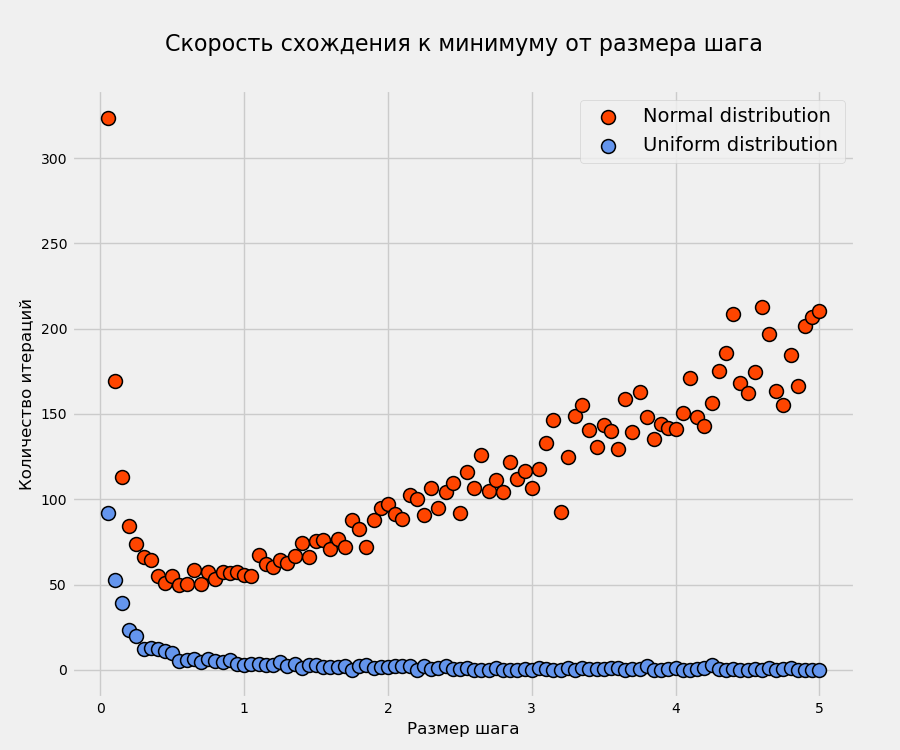

In [15]:
# Построим график зависимости скорости схождения алгоритма от размера шага

fig, ax = plt.subplots()
fig.set_size_inches(9, 7.5)

fs = 12

colors = (c for c in ['orangered', 'cornflowerblue'])
distr_type = {randn: 'Normal distribution', rand: 'Uniform distribution'}

for distr in distributions:
    ax.scatter(
        step_sizes, iterations_took[distr], color=next(colors),
        s=100, lw=1.1, edgecolor='black', label=distr_type[distr],
    )
    
ax.set_xlabel('Размер шага', fontsize=fs)
ax.set_ylabel('Количество итераций', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)
ax.legend()
ax.set_title('Скорость схождения к минимуму от размера шага', fontsize=fs+4, y=1.05)
    
plt.show()

Из графика наблюдается непостоянная зависимость скорости схождения алгоритма от размера шага. При значении шага, близком к нулю, скорость очень мала (количество итераций 200+) и стремительно увеличивается по мере увеличения размера шага до значения ~0.5. Затем, при значении шага от 0.5 и выше, скорость начинает снова замедляться для нормального распределения. В случае же равномерного расперделения количество итераций для шага 0.5 и более стремится к 0, что говорит о том, что алгоритм перестает сходится тем чаще, чем больше шаг.

### 3. Подсчет слов
Давайте теперь поработаем с настоящим файлом и действительно посчитаем в нем слова. Мы загрузим метаданные почтового сервера университета Мичигана. И попробуем **найти, с какого адреса ушло больше всего писем.**

In [1]:
# импортируем библиотеку для доступа к файлам в интернете
import requests
# в переменной mbox хранится текст для работы
mbox = requests.get('http://www.py4inf.com/code/mbox.txt').text

In [12]:
# Решение

import re
from collections import Counter

# Воспульзуемся регулярным выражением, чтобы найти все строки типа 'From: user@email.com'
# которые есть в конце каждого письма.
all_emails_from = re.findall(r'From: [a-zA-Z1-9.@a-zA-Z1-9.]+', mbox)
all_emails_from = list(map(lambda x: x[6:], all_emails_from))
print(f' Количество найденный адресов: {len(all_emails_from)}')
all_emails_from

 Количество найденный адресов: 1797


['stephen.marquard@uct.ac.za',
 'louis@media.berkeley.edu',
 'zqian@umich.edu',
 'rjlowe@iupui.edu',
 'zqian@umich.edu',
 'rjlowe@iupui.edu',
 'cwen@iupui.edu',
 'cwen@iupui.edu',
 'gsilver@umich.edu',
 'gsilver@umich.edu',
 'zqian@umich.edu',
 'gsilver@umich.edu',
 'wagnermr@iupui.edu',
 'zqian@umich.edu',
 'antranig@caret.cam.ac.uk',
 'gopal.ramasammycook@gmail.com',
 'david.horwitz@uct.ac.za',
 'david.horwitz@uct.ac.za',
 'david.horwitz@uct.ac.za',
 'david.horwitz@uct.ac.za',
 'stephen.marquard@uct.ac.za',
 'louis@media.berkeley.edu',
 'louis@media.berkeley.edu',
 'ray@media.berkeley.edu',
 'cwen@iupui.edu',
 'cwen@iupui.edu',
 'cwen@iupui.edu',
 'ray@media.berkeley.edu',
 'cwen@iupui.edu',
 'zqian@umich.edu',
 'cwen@iupui.edu',
 'zqian@umich.edu',
 'zqian@umich.edu',
 'zqian@umich.edu',
 'mmmay@indiana.edu',
 'cwen@iupui.edu',
 'zqian@umich.edu',
 'zqian@umich.edu',
 'zqian@umich.edu',
 'cwen@iupui.edu',
 'zqian@umich.edu',
 'cwen@iupui.edu',
 'ray@media.berkeley.edu',
 'zqian@umic

In [14]:
# Найдем самый частый из собранных адресов
emails_counter = Counter(all_emails_from)
most_common = emails_counter.most_common(1)[0]

print(f'Больше всего писем было отправлено с адреса {most_common[0]}: {most_common[1]} штук.')

Больше всего писем было отправлено с адреса zqian@umich.edu: 195 штук.


### 4. Напишите функцию, которая переводит число, записанное римскими цифрами, в десятичное

Символы для римских цифр:

    I             1
    V             5
    X             10
    L             50
    C             100
    D             500
    M             1000


Например, 2 записывается как II .

12 записывается как XII, что просто X + II.

Число 27 записывается как XXVII, что равно XX + V + II.

Римские цифры обычно записываются от большего к меньшему слева направо. Однако символы для 4 не IIII. Вместо этого число четыре записывается как IV, потому что если I стоит перед V, мы "вычитаем его", получая тем самым четыре. Тот же принцип работает и для числа девять, которое записывается как IX. Существует шесть случаев, когда используется вычитание:

    I может быть помещен перед V (5) и X (10) для получения 4 и 9.
    X может быть помещен перед L (50) и C (100) для получения 40 и 90.
    C может быть помещен перед D (500) и M (1000), чтобы получить 400 и 900.

In [32]:
# Решение

number = input('Введите число, которое необходимо записать римскими цифрами: ')

def to_roman_numerals(number: str)-> str:
    '''Переводит число в арабской записи в римскую запись.
    
    Args:
        number: str -- число в арабской записи
    
    Returns:
        res: str -- число в римской записи.
    
    '''

    arabic_to_roman = {
        1: 'I',
        5: 'V',
        10: 'X',
        50: 'L',
        100: 'C',
        500: 'D',
        1000: 'M'
    }

    res = ''

    for digit in number:
        power = len(number) - 1
        number = number[1:]
        multiplier = int(10 ** power)
        rank = int(digit) * multiplier
        if rank == 0:
            continue

        if rank >= 4000:
            needed_symbol = arabic_to_roman[1000]
            res += needed_symbol * (rank // 1000)
            continue
        if rank < 4 * multiplier:
            needed_symbol = arabic_to_roman[multiplier]
            res += needed_symbol * (rank // multiplier)
            continue
        if rank == 4 * multiplier:
            needed_symbol = arabic_to_roman[multiplier] + arabic_to_roman[multiplier * 5]
            res += needed_symbol
            continue
        if rank == 9 * multiplier:
            needed_symbol = arabic_to_roman[multiplier] + arabic_to_roman[multiplier * 10]
            res += needed_symbol
            continue
        if rank >= 5 * multiplier:
            needed_symbol_5 = arabic_to_roman[multiplier* 5]
            needed_symbol_1 = arabic_to_roman[multiplier] * ((rank - (multiplier * 5)) // (multiplier))
            res += needed_symbol_5 + needed_symbol_1
            continue
            
    return res

print(to_roman_numerals(number))

Введите число, которое необходимо записать римскими цифрами: 3056
MMMLVI


### 5. Напишите декоратор, который сначала выводит на печать имя вызываемой функции, затем делает паузу в 3 секунды, а затем вызывает функцию

(Про имя вызываемой функции можно глянуть в лекции - там один из декораторов такое делал)

In [19]:
def show_name_and_wait_3_sec(func):
    def wrapper(*args, **kwargs):
        import time
        print(f'Имя вызываемой функции: {func.__name__}')
        time.sleep(3)
        res = func(*args, **kwargs)
        return res
    return wrapper

@show_name_and_wait_3_sec
def povtoryushka(*args, **kwargs):
    
    for i, item in enumerate(args):
        print(f'Номер {i+1}: {item}')

    for k, v in kwargs.items():
        print(f'{k}: {v}')
        
        
povtoryushka('hi', 'hello', 12, None, odin='dwa', tri='chetyre')

Имя вызываемой функции: povtoryushka
Номер 1: hi
Номер 2: hello
Номер 3: 12
Номер 4: None
odin: dwa
tri: chetyre


### 6. Функции ошибок

В целом, машинное обучение часто сводится к минимизации какого-то функционала ошибки. Ваш алгоритм на обучающей выборке возвращает список предсказаний, который вы с помощью какого-то функционала сравниваете с правильными ответами и получаете некое значение (ошибку), которую нужно минимизировать. В этом задании необходимо реализовать ряд функционалов ошибок.


## Пример - MSE

In [1]:
from typing import List

def mse(prediction:List[float], 
        actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднеквадратичную ошибку
    '''
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    mse = sum((prediction[i] - actual_values[i])**2 for i in range(N))/N
    
    return mse

In [2]:
a = [1,2,3,4,5]
b = [1,2,3,10,6]

mse(a,b) == (6**2 + 1)/5

True

Аналогичным образом реализуйте следующий список функций ошибок:

    RMSE, LogLoss, HueberLoss, MAE, MAPE, sMAPE, log-cosh loss, quantile loss  :) 

Вопросы можно задавать

In [13]:
def rmse(prediction:List[float], 
        actual_values:List[float]) -> float:

    assert len(prediction) == len(actual_values)
    
    from numpy import sqrt
    
    N = len(prediction)
    rmse = sqrt(sum((prediction[i] - actual_values[i])**2 for i in range(N)) / N)
    
    return rmse

a = [1,2,3,4,5]  # Prediciton
b = [1,2,3,10,6]  # Actual_values

print(rmse(a, b))

2.7202941017470885


In [7]:
def log_loss(prediction:List[float], 
        actual_values:List[float]) -> float:

    def elementwise(y_true: float, y_pred: float) -> float:
        from numpy import log        
        return -(y_true*log(y_pred) + (1-y_true)*log(1 - y_pred))
    
    assert len(prediction) == len(actual_values)

    log_loss = [elementwise(y_true, y_pred) for y_true, y_pred in zip(actual_values, prediction)]
    
    return log_loss

a = [0.8, 0.2, 0.1, 0.6, 0.7, 0.15]  # Prediction
b = [1, 0, 0, 1, 1, 0]  # Actual_values

print(log_loss(a, b))

[0.2231435513142097, 0.2231435513142097, 0.10536051565782628, 0.5108256237659907, 0.35667494393873245, 0.16251892949777494]


In [28]:
def hueber_loss(prediction:List[float], 
        actual_values:List[float], delta=1) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    h_loss = []
    for i in range(N):
        if abs(actual_values[i] - prediction[i]) <= delta:
            h_loss.append(0.5*((actual_values[i] - prediction[i])**2))
        else:
            h_loss.append(delta*abs(actual_values[i] - prediction[i]) - 0.5*(delta**2))
            
    return h_loss

a = [1,2,3,4,5]  # Prediciton
b = [1,2,3,10,6]  # Actual_values

print(hueber_loss(a, b))

[0.0, 0.0, 0.0, 5.5, 0.5]


In [11]:
def mae(prediction:List[float], 
        actual_values:List[float]) -> float:

    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    mae = sum(actual_values[i] - prediction[i] for i in range(N)) / N
    
    return mae

a = [1,2,3,4,5]  # Prediciton
b = [1,2,3,10,6]  # Actual_values

print(mae(a, b))

1.4


In [14]:
def mape(prediction:List[float], 
        actual_values:List[float]) -> float:

    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    mape = sum(abs((actual_values[i] - prediction[i]) / actual_values[i]) for i in range(N)) / N
    
    return mape

a = [1,2,3,4,5]  # Prediciton
b = [1,2,3,10,6]  # Actual_values

print(mape(a, b))

0.15333333333333332


In [17]:
def smape(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    def elementwise(y_true: float, y_pred: float) -> float:
        return 2*abs(y_true - y_pred) / (abs(y_true) + abs(y_pred))

    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    smape = sum(elementwise(y_true, y_pred) for y_true, y_pred in zip(actual_values, prediction)) / N * 100
    
    return smape

a = [1,2,3,4,5]  # Prediciton
b = [1,2,3,10,6]  # Actual_values

print(smape(a, b))

20.77922077922078


In [20]:
def log_cosh_loss(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    from numpy import log, cosh
    
    N = len(prediction)
    log_cosh_loss = sum(log(cosh(prediction[i] - actual_values[i])) for i in range(N)) / N
    
    return log_cosh_loss

a = [1,2,3,4,5]  # Prediciton
b = [1,2,3,10,6]  # Actual_values

print(log_cosh_loss(a, b))

1.1481279588233118


In [25]:
# Formula source:
# https://towardsdatascience.com/quantile-loss-and-quantile-regression-b0689c13f54d


def quantile_loss(prediction:List[float], 
        actual_values:List[float], alpha=0.8) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    q_loss = []
    for i in range(N):
        if prediction[i] <= actual_values[i]:
            q_loss.append(alpha * (actual_values[i] - prediction[i]))
        else:
            q_loss.append((1 - alpha) * (prediction[i] - actual_values[i]))
            
    return q_loss

a = [1,2,3,4,5]  # Prediciton
b = [1,2,3,10,6]  # Actual_values

print(quantile_loss(a, b))

[0.0, 0.0, 0.0, 4.800000000000001, 0.8]
